In [197]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
df = pd.read_csv('dataset.csv')

In [199]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [200]:
print("size of dataset: ",df.shape)

size of dataset:  (308854, 19)


In [201]:
print("feature names: ", df.columns.values)

feature names:  ['General_Health' 'Checkup' 'Exercise' 'Heart_Disease' 'Skin_Cancer'
 'Other_Cancer' 'Depression' 'Diabetes' 'Arthritis' 'Sex' 'Age_Category'
 'Height_(cm)' 'Weight_(kg)' 'BMI' 'Smoking_History' 'Alcohol_Consumption'
 'Fruit_Consumption' 'Green_Vegetables_Consumption'
 'FriedPotato_Consumption']


In [202]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [203]:
for col in df:
    if df[col].dtype == object:
        print(col,": ",df[col].unique())

General_Health :  ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup :  ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise :  ['No' 'Yes']
Heart_Disease :  ['No' 'Yes']
Skin_Cancer :  ['No' 'Yes']
Other_Cancer :  ['No' 'Yes']
Depression :  ['No' 'Yes']
Diabetes :  ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis :  ['Yes' 'No']
Sex :  ['Female' 'Male']
Age_Category :  ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
Smoking_History :  ['Yes' 'No']


In [204]:
print("number of null values:\n",df.isna().sum())

number of null values:
 General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


# Checking for outliers


In [205]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


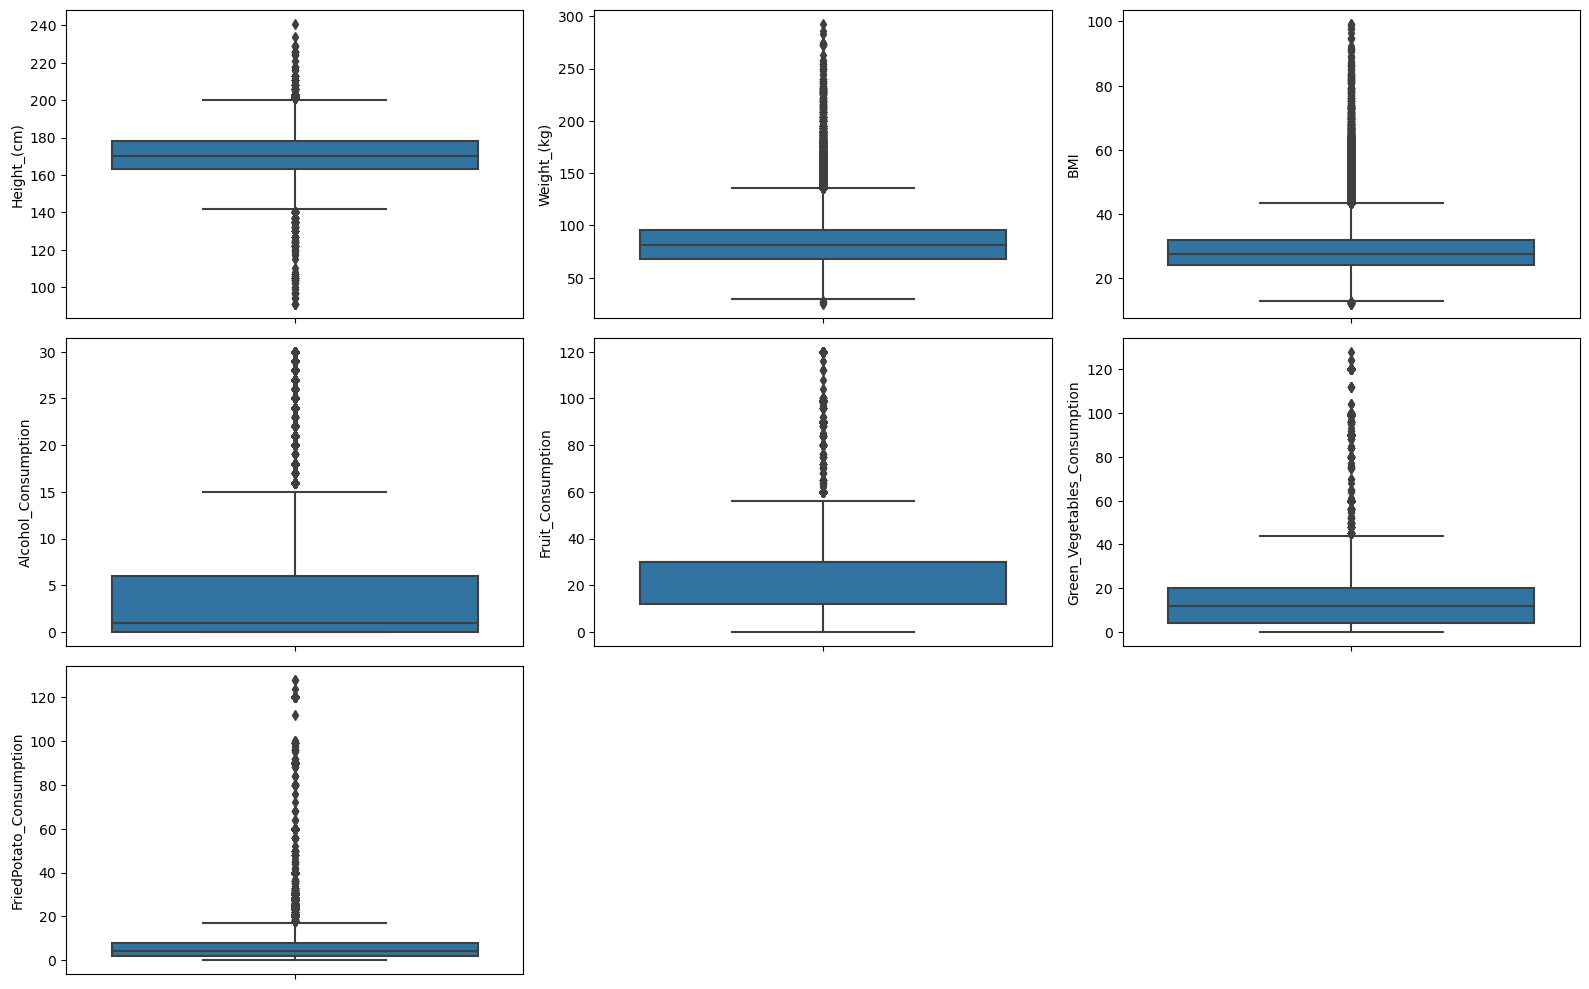

In [206]:
# List of numerical columns
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']

# Create box plots
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])

plt.tight_layout()

There are outliers in Height and Weight columns which could also be just extreme values. But, highest value of BMI is 99.33 which seems to be error. I will manually calculate the top 20 BMI values and compare it to the given value.

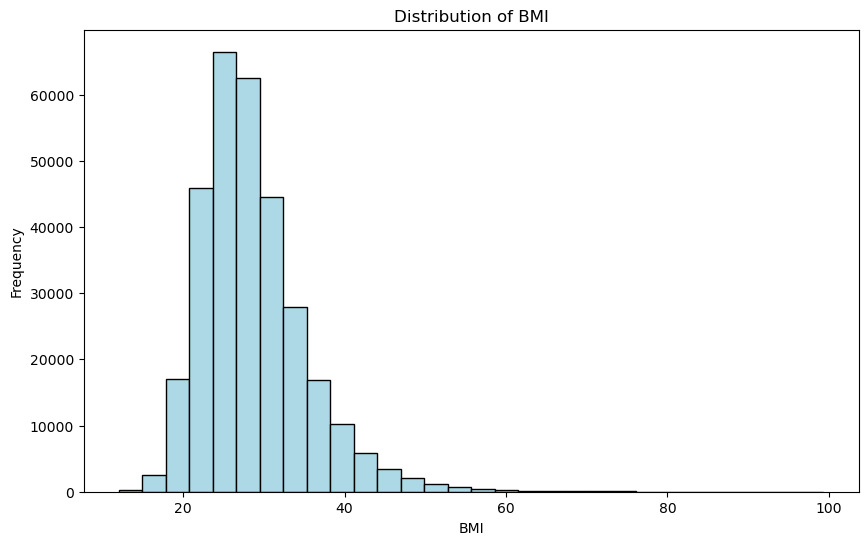

In [207]:
#histogram for BMI
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [208]:
top_20_indices = df['BMI'].nlargest(20).index
selected_columns = ['BMI', 'Height_(cm)', 'Weight_(kg)'] 
top_20_rows = df.loc[top_20_indices,selected_columns]
top_20_rows['calculated'] = top_20_rows['Weight_(kg)']/ (top_20_rows['Height_(cm)'] * top_20_rows['Height_(cm)']*0.0001) # Example calculation


# Printing the top 20 rows
print(top_20_rows)


          BMI  Height_(cm)  Weight_(kg)  calculated
255795  99.33         97.0        92.53   98.342013
208799  99.17        110.0       120.00   99.173554
30023   98.44         96.0        90.72   98.437500
216846  97.65        168.0       274.42   97.229308
53676   97.58         94.0        86.18   97.532820
253253  96.52        165.0       263.08   96.631772
195510  94.94         97.0        88.45   94.005739
253618  94.94         91.0        79.38   95.857988
263457  94.41        163.0       249.48   93.898905
292793  92.45         99.0        90.72   92.561983
86515   91.82        157.0       227.70   92.376973
271232  91.52        165.0       249.48   91.636364
218058  91.23        173.0       272.16   90.935213
304337  91.23        173.0       272.16   90.935213
116592  90.39        168.0       254.01   89.997874
4099    89.10        160.0       228.16   89.125000
21690   89.10        160.0       228.16   89.125000
76843   88.57        160.0       226.80   88.593750
279867  87.7

There is no discrepancy with given BMI values and calculated values. Hence, we will not be removing those.

# Dropping Null values


In [209]:
df.duplicated().sum()

80

In [210]:
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


# Correlation Matrix

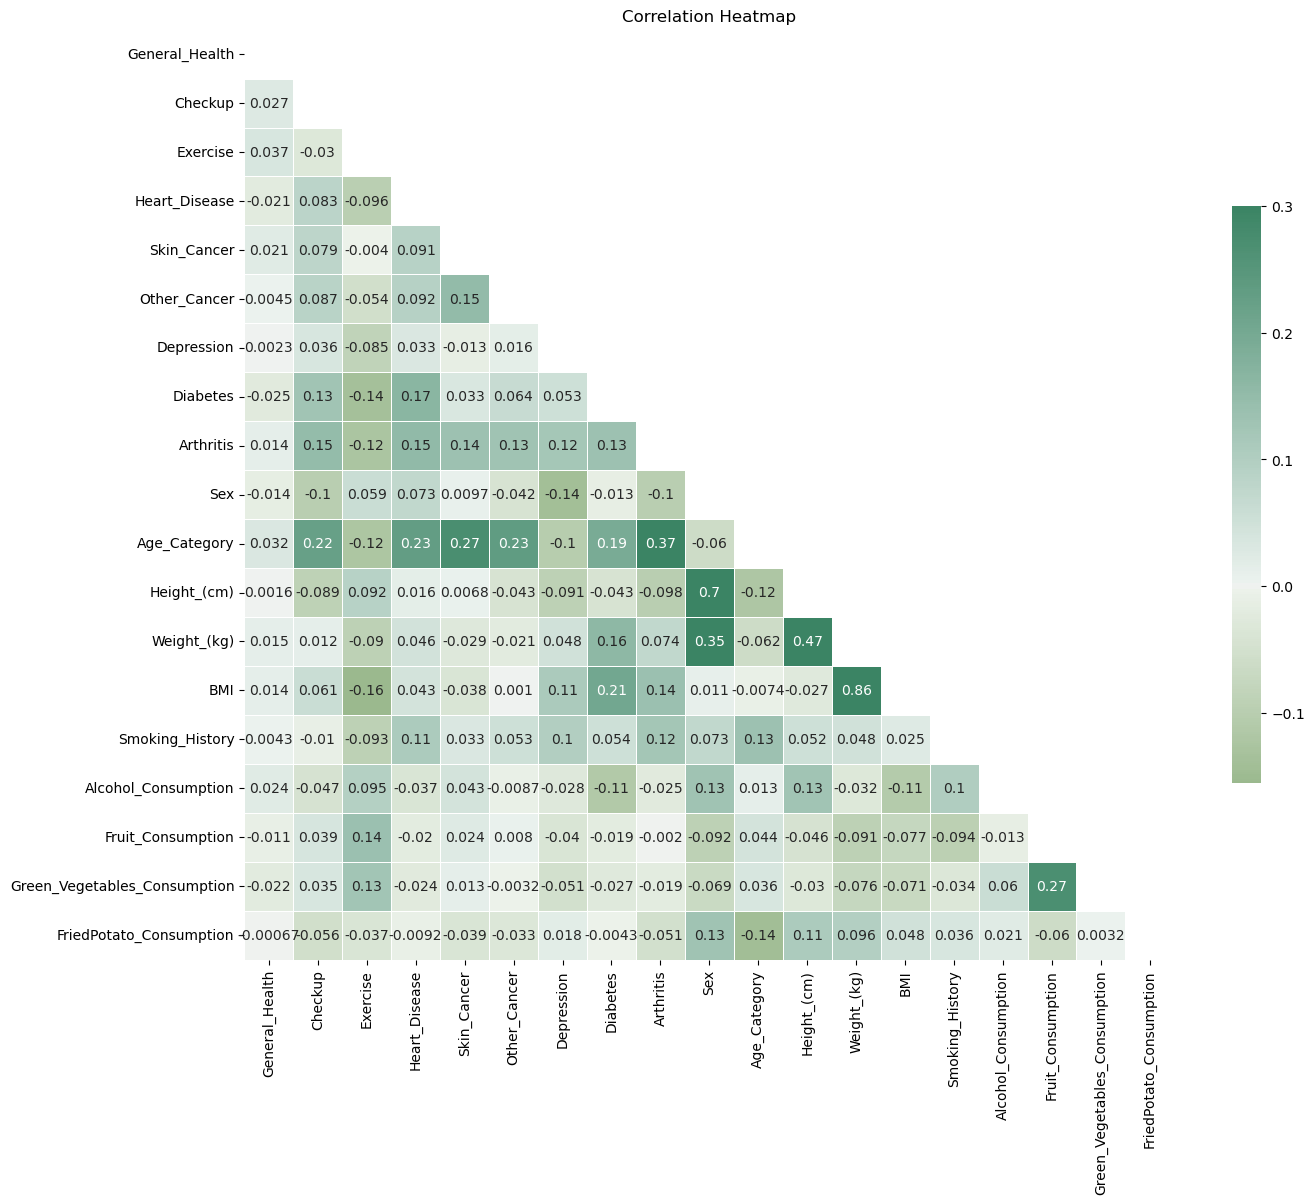

In [211]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(480, 150, as_cmap=True)

sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
#sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

There seems to be correlation between Age and all the diseases, We'll plot a countplot for each to verify

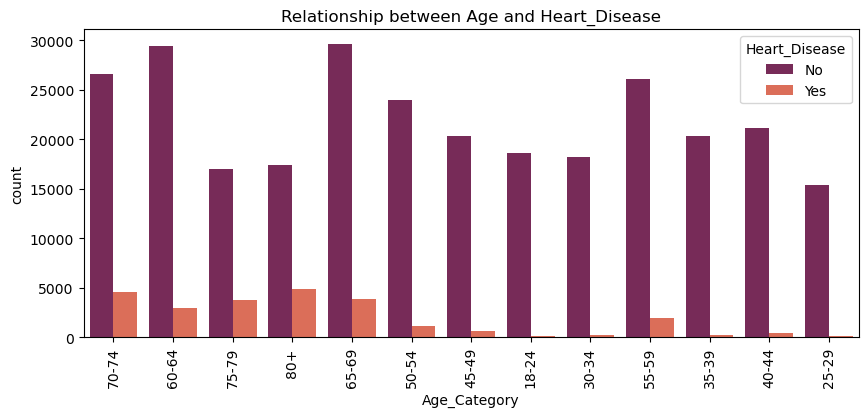

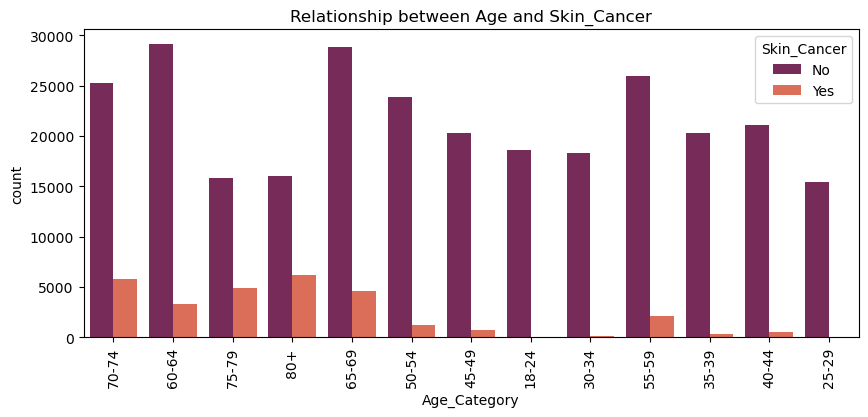

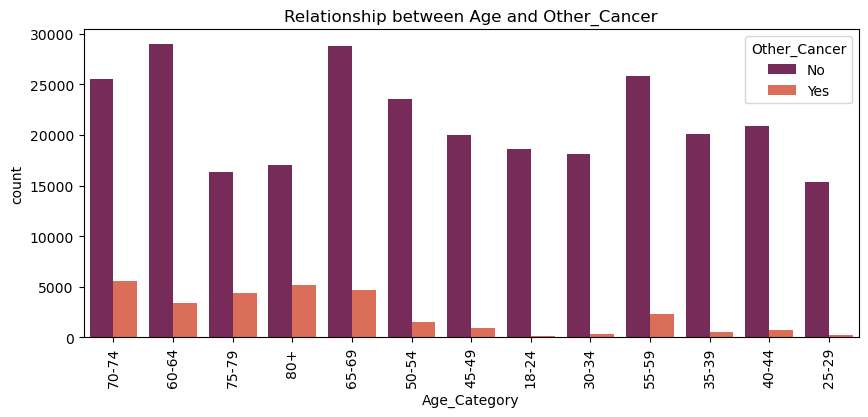

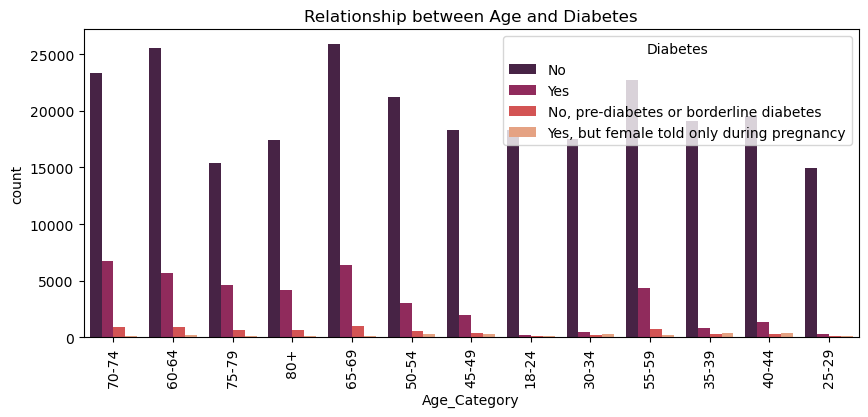

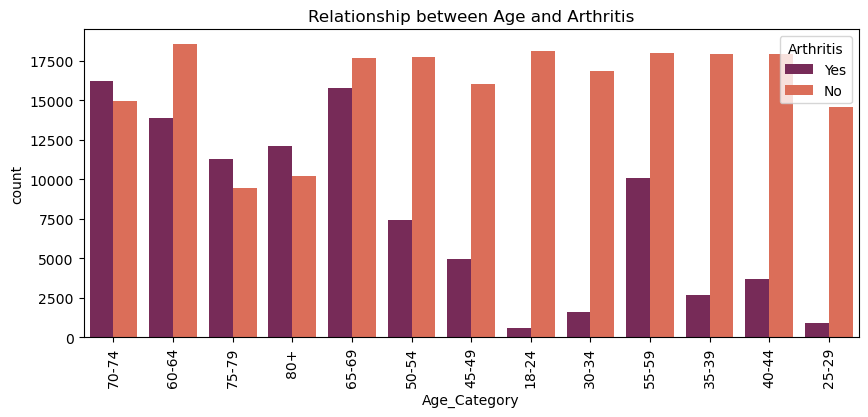

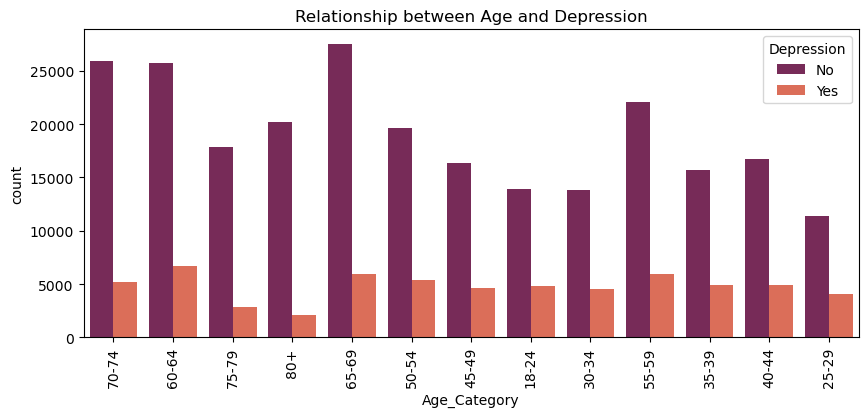

In [212]:
custom_order = ['Within the past year', 'Within the past 2 years', '5 or more years ago'
 'Within the past 5 years', 'Never']


health_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis','Depression']

for condition in health_conditions:
    
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x='Age_Category', hue=condition, palette='rocket')
        plt.title('Relationship between Age and ' + condition)
        plt.xticks(rotation=90)
        plt.show()



Except for Depression, The prevalence of diseases increases with age, with it being most common in the 70+ age category. 

Since there is positive correlation between Checkup and diseases, We'll plot a countplot for each to verify

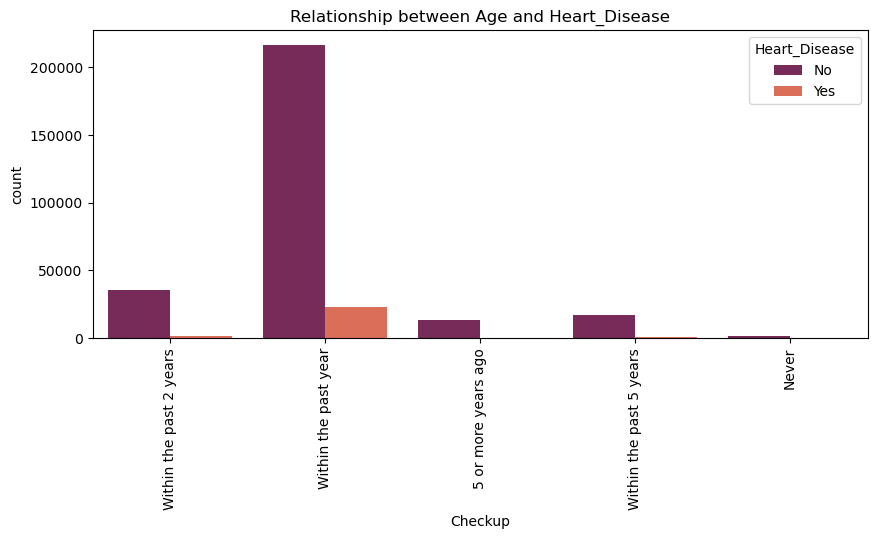

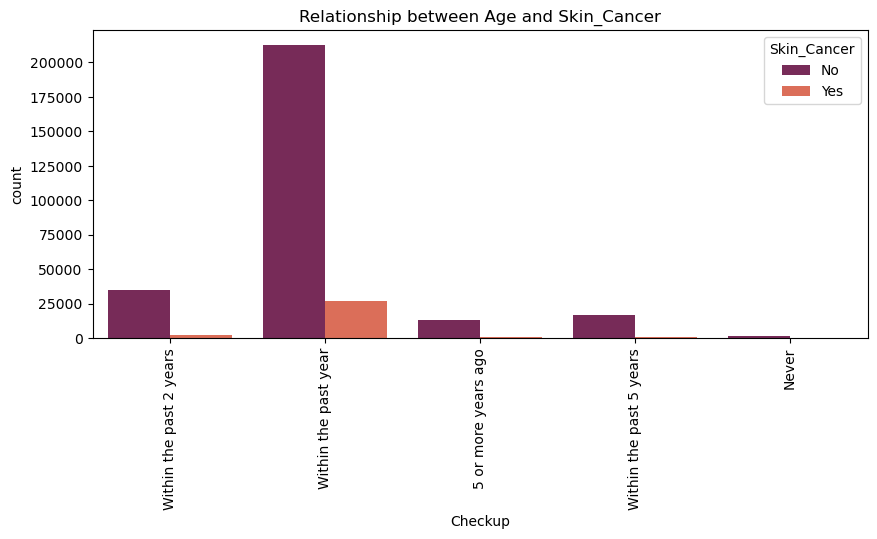

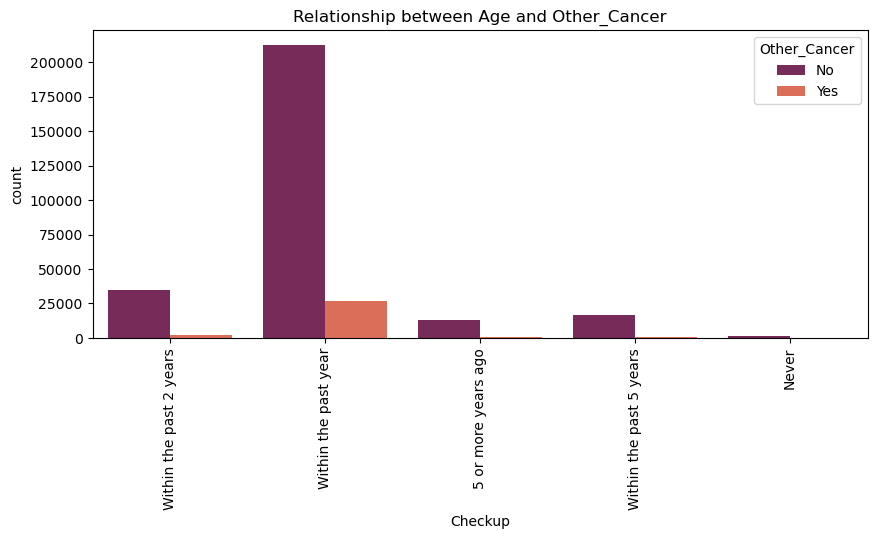

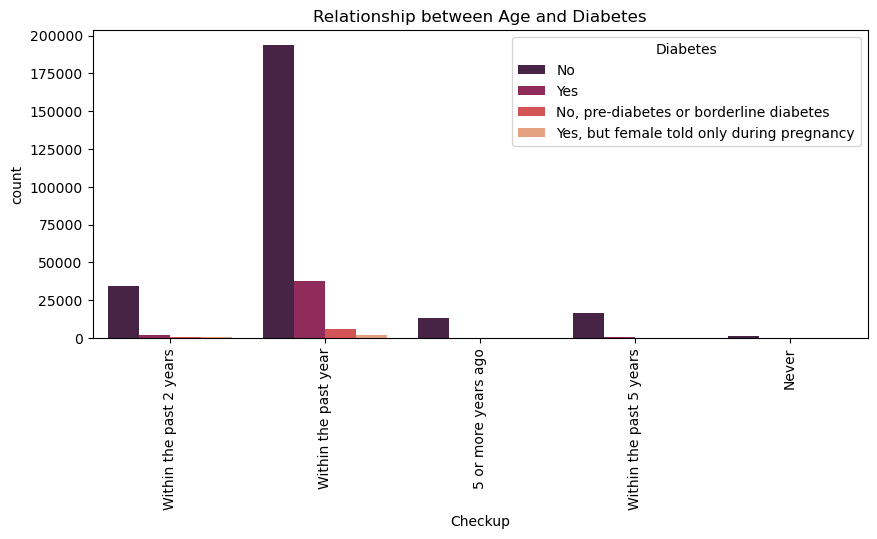

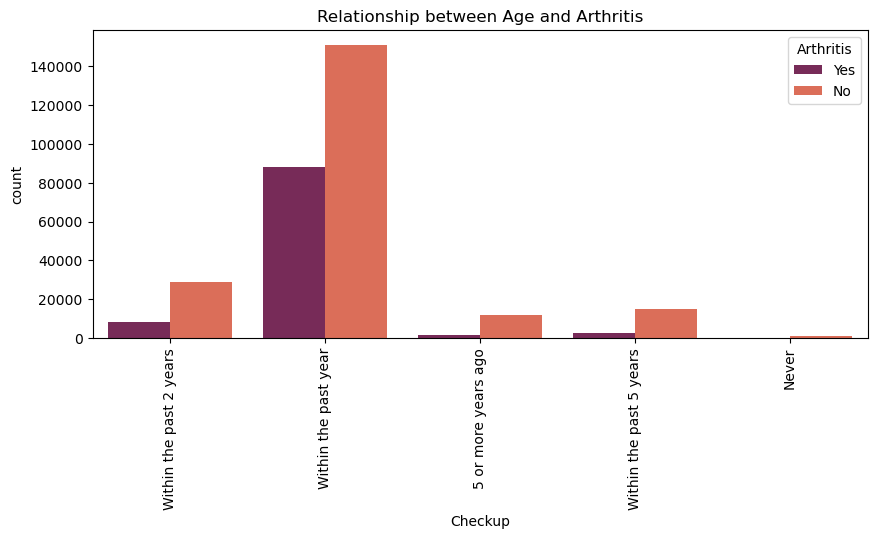

In [213]:
custom_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

health_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for condition in health_conditions:
    
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x='Checkup', hue=condition, palette='rocket')
        plt.title('Relationship between Age and ' + condition)
        plt.xticks(rotation=90)
        plt.show()




Below plot shows the distribution of Alcohol consumption.

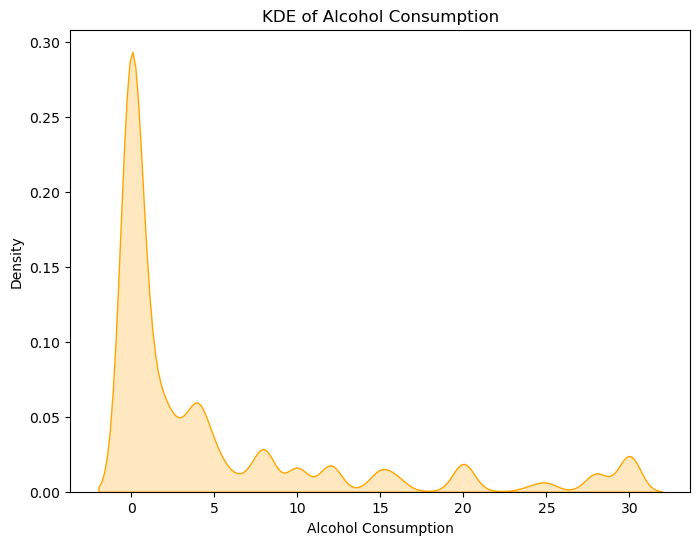

In [214]:
#Kernel Density Estimation (KDE) for Alcohol_Consumption:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Alcohol_Consumption'], shade=True, color='orange')
plt.title('KDE of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Density')
plt.show()


We plotted heat map between General Health and Exercise.  It shows that overall health of individuals is good if they are exercising.

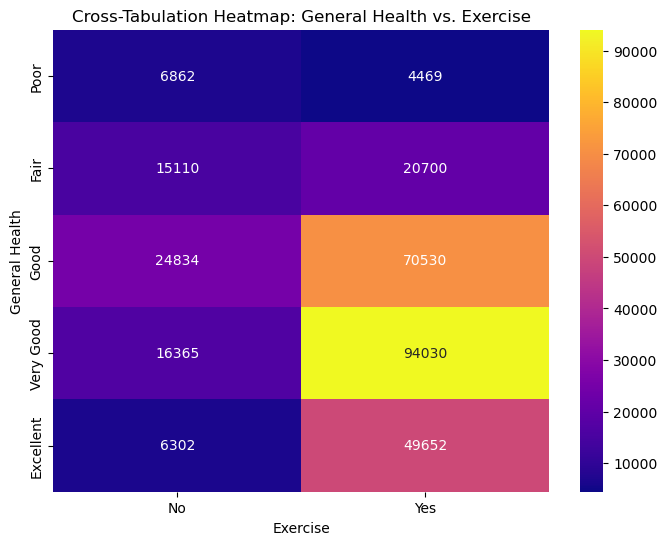

In [215]:
# Creating a cross-tabulation of General Health and Exercise
cross_tabulation = pd.crosstab(df['General_Health'], df['Exercise'])
cross_tabulation = cross_tabulation.reindex(['Poor','Fair','Good','Very Good','Excellent'])

plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(cross_tabulation, annot=True, fmt='d', cmap='plasma')

heatmap.set_title('Cross-Tabulation Heatmap: General Health vs. Exercise')
heatmap.set_xlabel('Exercise')
heatmap.set_ylabel('General Health')

plt.show()

We plotted heat map between General Health and Age. It shows that overall health of individuals deteriorates as they grow old.

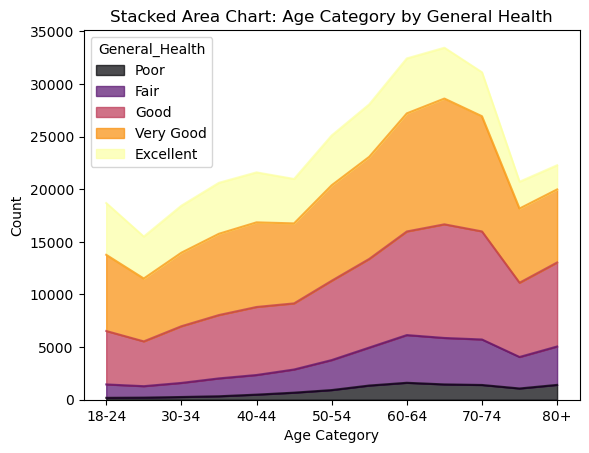

In [216]:
#Stacked Area Chart Age_Category by General_Health.
crosstab = pd.crosstab(df['Age_Category'], df['General_Health'])
crosstab = crosstab[['Poor','Fair','Good','Very Good','Excellent']]

crosstab.plot(kind='area', colormap='inferno', alpha=0.7, stacked=True)

plt.title('Stacked Area Chart: Age Category by General Health')
plt.xlabel('Age Category')
plt.ylabel('Count')

plt.show()

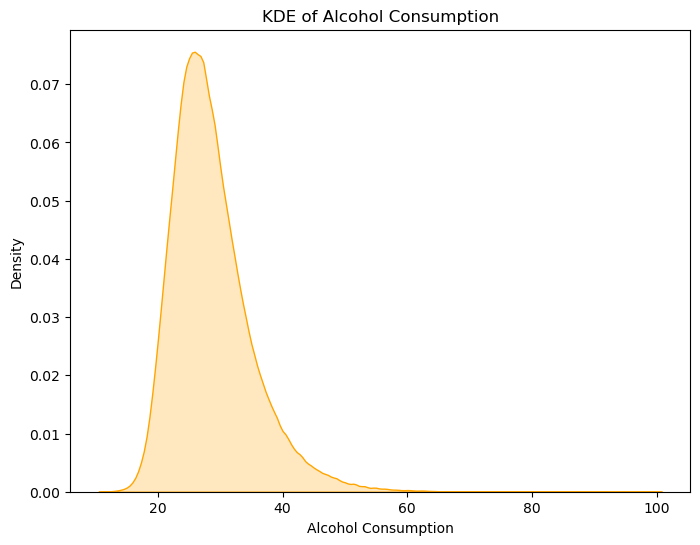

In [217]:
#Kernel Density Estimation (KDE) for Alcohol_Consumption:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['BMI'], shade=True, color='orange')
plt.title('KDE of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Density')
plt.show()


In [218]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [219]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

checkup_mapping = {'Within the past year': 4, 'Within the past 2 years': 2, 'Within the past 5 years': 1, '5 or more years ago': 0.2, 'Never': 0}
df['Checkup_Frequency'] = df['Checkup'].replace(checkup_mapping)

df = pd.get_dummies(df, columns=['Sex'])

# Mapping for Diabetes
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)

bmi_mapping = {
    'Underweight': 0,
    'Normal weight': 1,
    'Overweight': 2,
    'Obesity': 3
}

df['BMI_Category'] = df['BMI_Category'].map(bmi_mapping).astype(int)

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})
    
    
# Ordinal encoding for General_Health, Age_Category,BMI_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['General_Health'] = df['General_Health'].map(general_health_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df['Age_Category'] = df['Age_Category'].map(age_category_mapping)  

df = df.drop(["Checkup"],axis=1)


In [220]:
df.head()

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category,Checkup_Frequency,Sex_Female,Sex_Male
0,0,0,0,0,0,0,0,1,10,150.0,...,14.54,1,0.0,30.0,16.0,12.0,0,2.0,1,0
1,3,0,1,0,0,0,1,0,10,165.0,...,28.29,0,0.0,30.0,0.0,4.0,2,4.0,1,0
2,3,1,0,0,0,0,1,0,8,163.0,...,33.47,0,4.0,12.0,3.0,16.0,3,4.0,1,0
3,0,1,1,0,0,0,1,0,11,180.0,...,28.73,0,0.0,30.0,30.0,8.0,2,4.0,0,1
4,2,0,0,0,0,0,0,0,12,191.0,...,24.37,1,0.0,8.0,4.0,0.0,1,4.0,0,1


In [221]:
df.to_csv("preprocessed_data.csv", sep='\t', encoding='utf-8')